A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:   

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [2]:
ds_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = ds_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

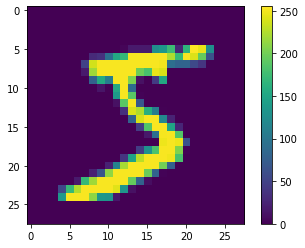

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

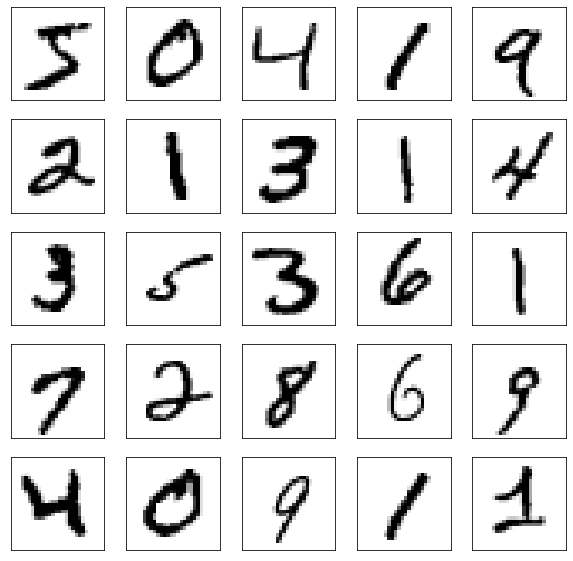

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
train_images_gr = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 28, 28, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (60000, 28, 28, 1)
test_images_gr shape: (10000, 28, 28, 1)


### MODELO 1

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [13]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model = keras.models.Sequential()


# First conv-pool layers - set 1
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
# transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles)
model.add(keras.layers.Flatten())

# Dense layer with dropout
model.add(keras.layers.Dense(units=32, activation="relu"))

# Output layer
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                43296     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [14]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3511 - accuracy: 0.8943
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1999 - accuracy: 0.9391
Epoch 3/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1464 - accuracy: 0.9553
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1109 - accuracy: 0.9652
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0920 - accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0758 - accuracy: 0.9757
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0659 - accuracy: 0.9786
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0602 - accuracy: 0.9806
Epoch 9/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0551 - accuracy: 0.9826
Epoch 10/10
1875/1875 [==============================] - 52s 27m

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.0498 - accuracy: 0.9834

Test accuracy: 0.9833999872207642


### PREDICCIONES

In [20]:
predictions = model.predict(test_images)

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

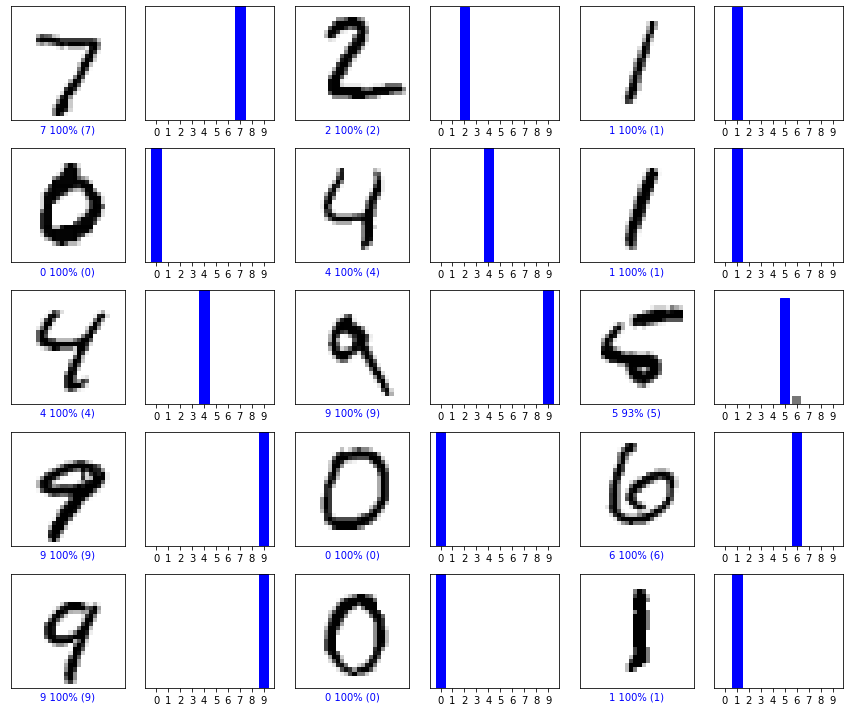

In [26]:
# Imagen de test (real vs prediccion). Aciertos (azul) y Fallos (Rojo)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### MODELO 2

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)


In [29]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (28,28,1)

model2 = keras.models.Sequential()


# First conv-pool layers - set 1
model2.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model2.add(keras.layers.Dropout(rate=0.25))

# Flatten layer
# transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles)
model2.add(keras.layers.Flatten())

# Dense layers
model2.add(keras.layers.Dense(units=16, activation="relu"))
model2.add(keras.layers.Dense(units=32, activation="relu"))
# Output layer
model2.add(keras.layers.Dense(units=10, activation="softmax"))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                21648     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [30]:
# Compilar el modelo
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model2.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3748 - accuracy: 0.8810
Epoch 2/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1606 - accuracy: 0.9520
Epoch 3/10
1875/1875 [==============================] - 180s 96ms/step - loss: 0.1231 - accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1060 - accuracy: 0.9675
Epoch 5/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0929 - accuracy: 0.9707
Epoch 6/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0847 - accuracy: 0.9732
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0796 - accuracy: 0.9751
Epoch 8/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0748 - accuracy: 0.9761
Epoch 9/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0684 - accuracy: 0.9782
Epoch 10/10
1875/1875 [==============================] - 60s 32

In [33]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.0507 - accuracy: 0.9837

Test accuracy: 0.9836999773979187


In [39]:
import pandas as pd
resultado = pd.read_csv("res_conv_mnist.csv", sep = ";" )

In [41]:
resultado

,MODELO,EPOCH,SEG,LOSS,ACC
0,M1,1,73,0.3511,0.8943
1,M1,2,64,0.1999,0.9391
2,M1,3,84,0.1464,0.9553
3,M1,4,61,0.1109,0.9652
4,M1,5,63,0.0920,0.9717
5,M1,6,67,0.0758,0.9757
6,M1,7,46,0.0659,0.9786
7,M1,8,48,0.0602,0.9806
8,M1,9,50,0.0551,0.9826
9,M1,10,52,0.0489,0.9839


Text(0.5, 1.0, 'Loss & Acc Convolution Mnist (Modelo 1 vs Modelo2')

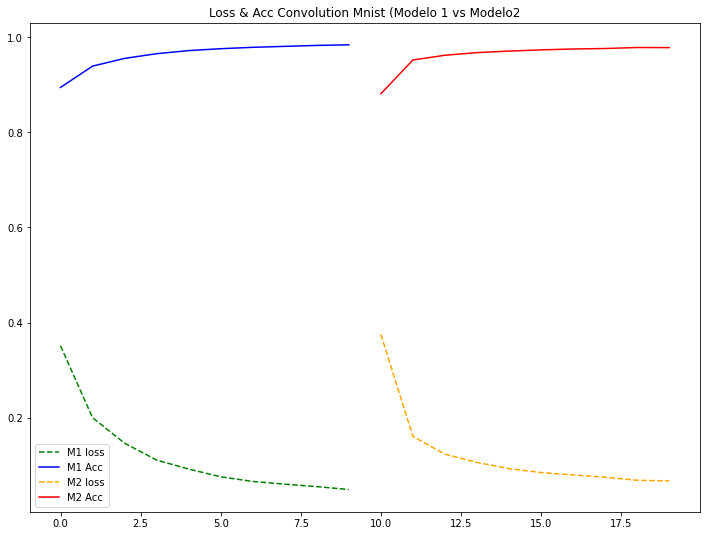

In [48]:
# Visualización general del entrenamiento
plt.figure(figsize = (12,9))
plt.plot(resultado[resultado.MODELO=='M1'].LOSS, label="M1 loss",color='green', linestyle='dashed')
plt.plot(resultado[resultado.MODELO=='M1'].ACC, label="M1 Acc",color='blue')
plt.plot(resultado[resultado.MODELO=='M2'].LOSS, label="M2 loss",color='orange', linestyle='dashed')
plt.plot(resultado[resultado.MODELO=='M2'].ACC, label="M2 Acc",color='red')
plt.legend()
plt.title ("Loss & Acc Convolution Mnist (Modelo 1 vs Modelo2)")
#plt.show()

`Aunque el el conjunto de test dió mejor resultado el modelo 2, el modelo 1 resultó  mejor (en términos de accuracy y loss con el conjunto de entrenamiento). Los resultados son muy similares por lo que para concluir cual tiene mejor desempeño habría que probarlo con más cantidad de datos.`